<a href="https://colab.research.google.com/github/alondonoco/SenalesSistemas/blob/main/PARCIAL1/PRIMER%20PARCIAL%20SIMULACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

In [ ]:
# --- Definición de la señal original x(t) ---
def signal_xt(t):
    return 25 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# Genera el vector de tiempo (al menos dos periodos del menor T = 2*pi/5)
t = np.linspace(0, 2 * 2 * np.pi / 5, 1000)  # Dos periodos del menor T

# Calcula la señal original
original_signal = signal_xt(t)

# --- Acondicionamiento de la señal ---

# Determina el rango de la señal original
min_original = np.min(original_signal)
max_original = np.max(original_signal)

# Rango de entrada del microprocesador
min_entrada = -3.3
max_entrada = 5.0

# Factor de escalado
scaling_factor = (max_entrada - min_entrada) / (max_original - min_original)

# Offset
offset = min_entrada - scaling_factor * min_original

# Señal acondicionada
conditioned_signal = scaling_factor * original_signal + offset

# --- Digitalización (CAD de 5 bits) ---

# Número de bits
bits = 5
cant_niveles = 2 ** bits

# Tamaño del paso para cada nivel en el rango de entrada
step_size = (max_entrada - min_entrada) / (cant_niveles - 1)

# Niveles de cuantización
quantizacion_niveles = np.linspace(min_entrada, max_entrada, cant_niveles)

# Proceso de digitalización
digitized_signal = np.zeros_like(conditioned_signal)
for i, value in enumerate(conditioned_signal):
    # Encuentra el nivel de cuantización más cercano
    closest_level_index = np.argmin(np.abs(quantizacion_niveles - value))
    digitized_signal[i] = quantizacion_niveles[closest_level_index]



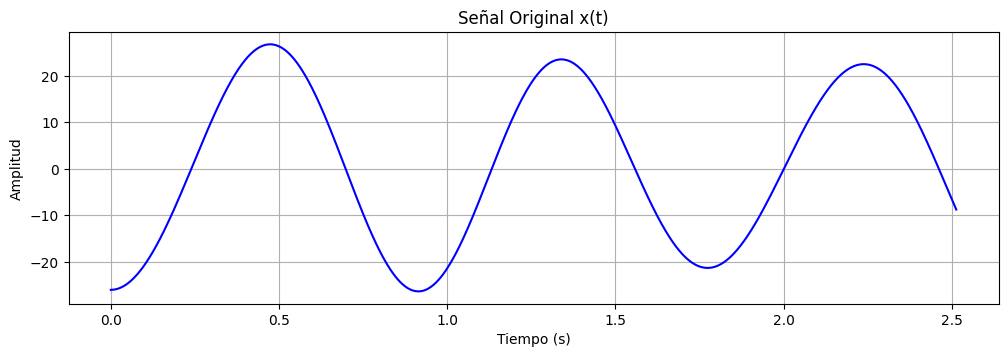

In [ ]:
# --- Graficar ---

plt.figure(figsize=(12, 12))

# Gráfica de la señal original
plt.subplot(3, 1, 1)
plt.plot(t, original_signal, color='blue')
plt.title('Señal Original x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

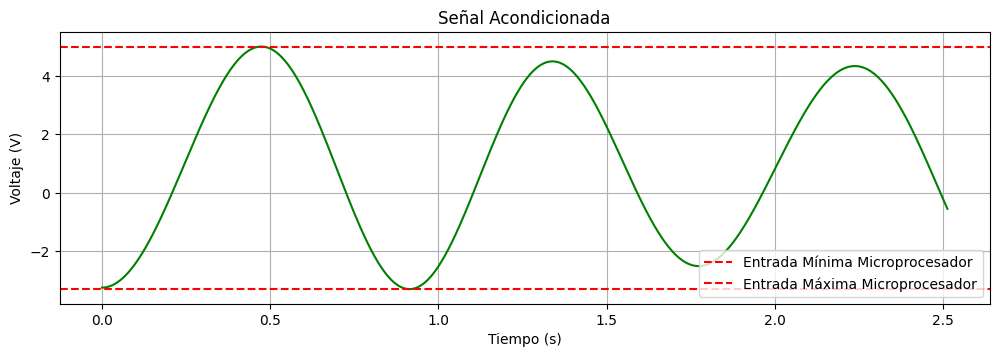

In [ ]:
plt.figure(figsize=(12, 12))

# Gráfica de la señal acondicionada
plt.subplot(3, 1, 2)
plt.plot(t, conditioned_signal, color='green')
plt.title('Señal Acondicionada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.ylim(min_entrada - 0.5, max_entrada + 0.5)
plt.axhline(min_entrada, color='r', linestyle='--', label='Entrada Mínima Microprocesador')
plt.axhline(max_entrada, color='r', linestyle='--', label='Entrada Máxima Microprocesador')
plt.legend()
plt.grid(True)

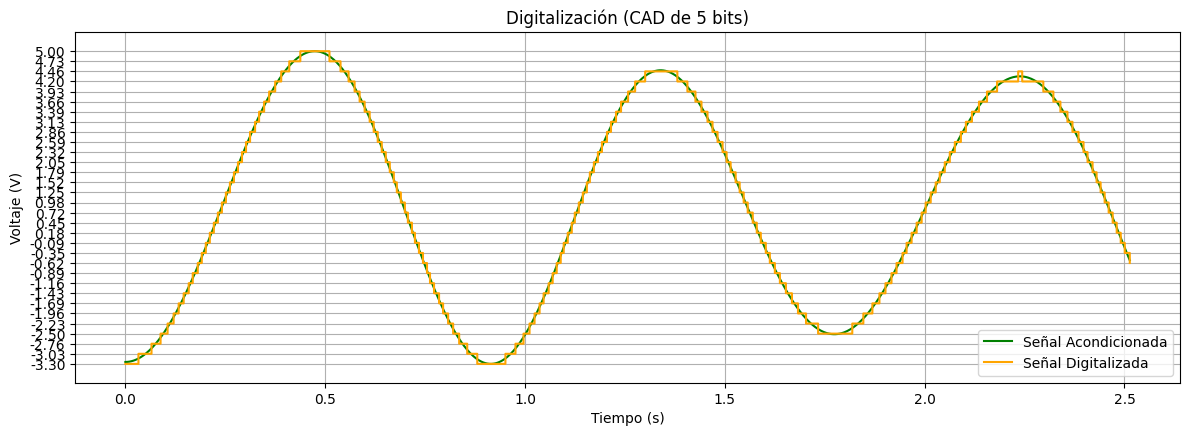

In [ ]:
plt.figure(figsize=(12, 12))

# Gráfica de la señal digitalizada
plt.subplot(3, 1, 3)
plt.plot(t, conditioned_signal, label='Señal Acondicionada', color='green')
plt.step(t, digitized_signal, where='post', label='Señal Digitalizada', color='orange')
plt.title('Digitalización (CAD de 5 bits)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.ylim(min_entrada - 0.5, max_entrada + 0.5)
plt.yticks(quantizacion_niveles, [f'{level:.2f}' for level in quantizacion_niveles])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**EJERCICIO 2**

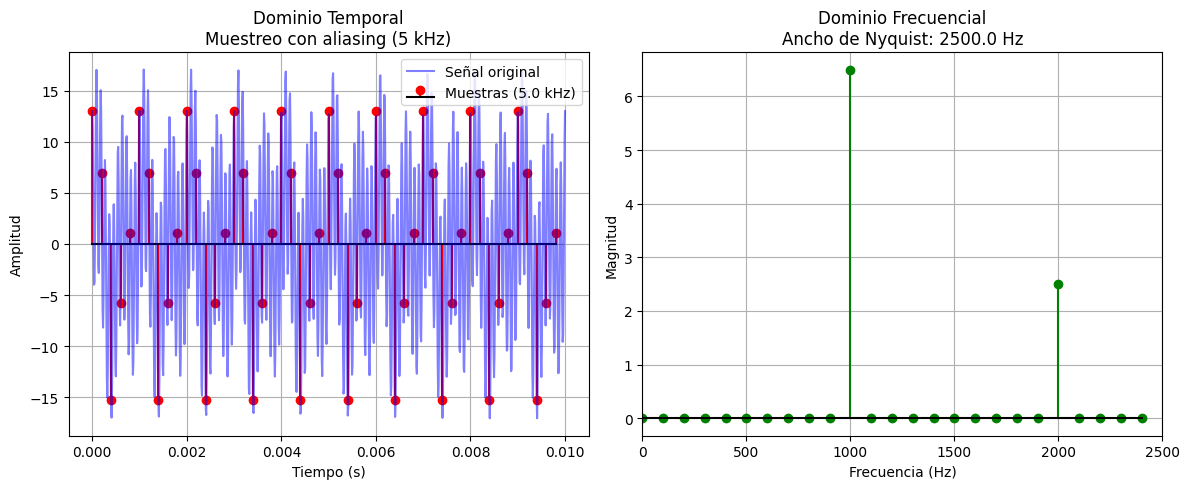

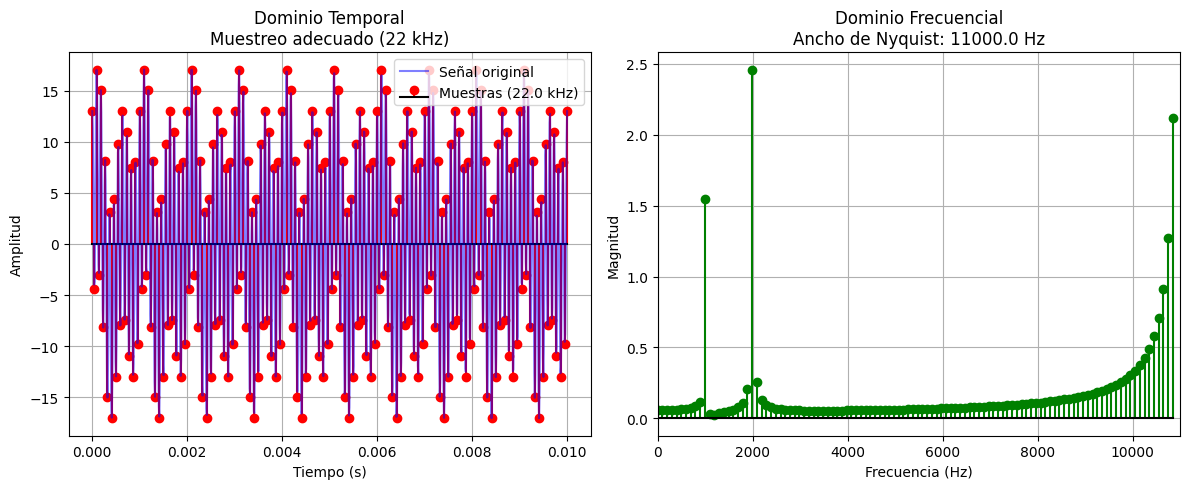

In [ ]:
# --- Configuración de la señal según el segundo ejercicio ---

# Frecuencias de los componentes sinusoidales (en Hz)
f1 = 1000  # Frecuencia componente 1
f2 = 2000  # Frecuencia componente 2
f3 = 11000  # Frecuencia componente 3

# Amplitudes de cada componente
a1, a2, a3 = 3, 5, 10

# Frecuencias de muestreo (sampling rates)
fs_insuficiente = 5000  # 5 kHz (insuficiente para f3)
fs_adecuada = 22000     # 22 kHz (suficiente para todas las frecuencias)

# Duración de la señal en segundos
duration = 0.01  # 10 ms

# --- Función para analizar el efecto del muestreo ---
def analizar_muestreo(fs, title):
    # Generación del vector de tiempo discreto
    t = np.arange(0, duration, 1/fs)

    # Creación de la señal muestreada compuesta por 3 sinusoides
    x = (a1 * np.cos(2*np.pi*f1*t) +
         a2 * np.sin(2*np.pi*f2*t) +
         a3 * np.cos(2*np.pi*f3*t))

    # Cálculo de la Transformada Rápida de Fourier (FFT)
    N = len(t)
    freq = fftfreq(N, 1/fs)[:N//2]
    X = np.abs(fft(x)[:N//2]) / N

    # Generación de la señal continua de referencia
    t_cont = np.linspace(0, duration, 1000)
    x_cont = (a1 * np.cos(2*np.pi*f1*t_cont) +
              a2 * np.sin(2*np.pi*f2*t_cont) +
              a3 * np.cos(2*np.pi*f3*t_cont))

    # Gráficos
    plt.figure(figsize=(12, 5))

    # Subgráfico 1: Dominio del tiempo
    plt.subplot(1, 2, 1)
    plt.stem(t, x, 'r', markerfmt='ro', basefmt="black", linefmt='r-', label=f'Muestras ({fs/1000} kHz)')
    plt.plot(t_cont, x_cont, 'b-', alpha=0.5, label='Señal original')
    plt.title(f'Dominio Temporal\n{title}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)

    # Subgráfico 2: Dominio de la frecuencia
    plt.subplot(1, 2, 2)
    plt.stem(freq, X, 'g', markerfmt='go', basefmt="black")
    plt.title(f'Dominio Frecuencial\nAncho de Nyquist: {fs/2} Hz')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, fs/2)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --- Análisis de muestreo ---

# Análisis con frecuencia insuficiente
analizar_muestreo(fs_insuficiente, "Muestreo con aliasing (5 kHz)")

# Análisis con frecuencia adecuada
analizar_muestreo(fs_adecuada, "Muestreo adecuado (22 kHz)")


**EJERCICIO 3**

In [ ]:
import numpy as np
import sympy as sp  # Import sympy with the alias sp

# Variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T
x1 = A * sp.cos(w0 * t)

# Definimos x2 por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t <= T))
)

# Diferencia al cuadrado
diff_sq = sp.simplify((x1 - x2)**2)

# Integramos en los tres tramos
int1 = sp.integrate(diff_sq, (t, 0, T/4))
int2 = sp.integrate(diff_sq, (t, T/4, 3*T/4))
int3 = sp.integrate(diff_sq, (t, 3*T/4, T))

# Distancia media
d = (1 / T) * (int1 + int2 + int3)
d_simplificada = sp.simplify(sp.expand(d))

# Mostrar resultado
sp.pprint(d_simplificada)

# Valor numérico si A = 1
d_val = d_simplificada.subs(A, 1)
d_val.evalf()

 2          
A    4⋅A    
── - ─── + 1
2     π     


0.226760455264837

**EJERCICIO 4**

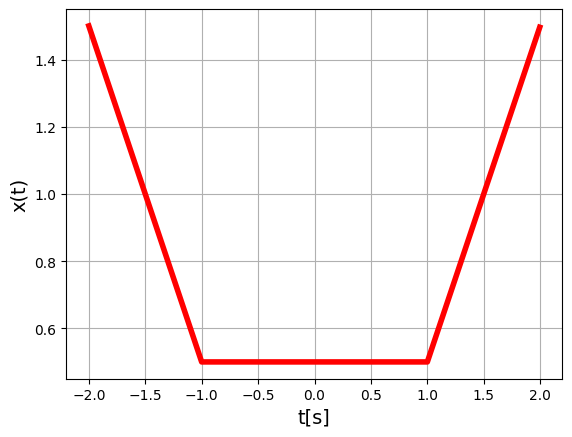

In [ ]:
from ipywidgets import interact,IntSlider
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)+1.5



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-25-51689c077dbf>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


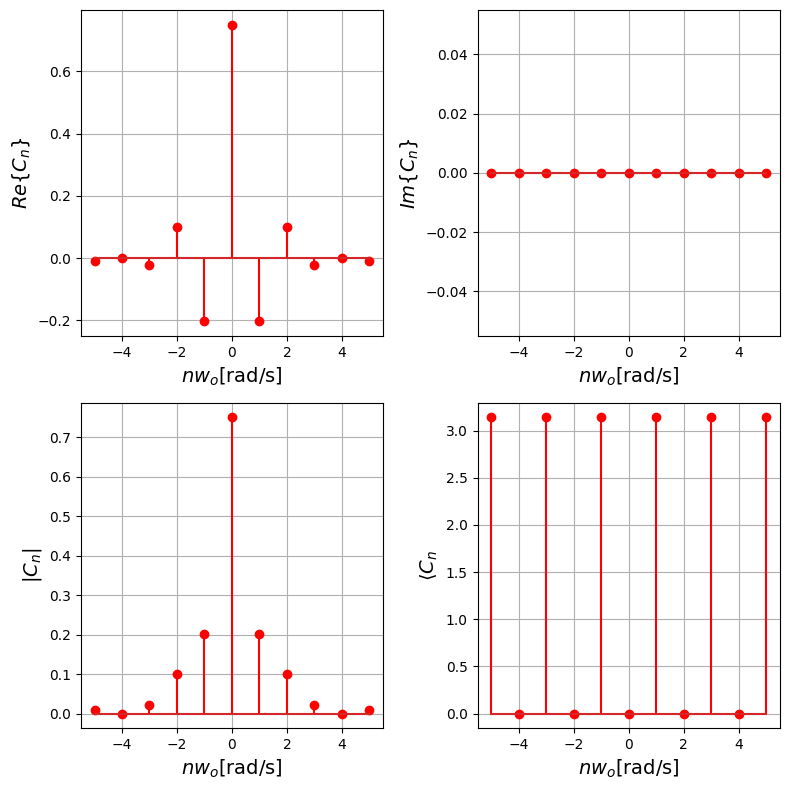

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


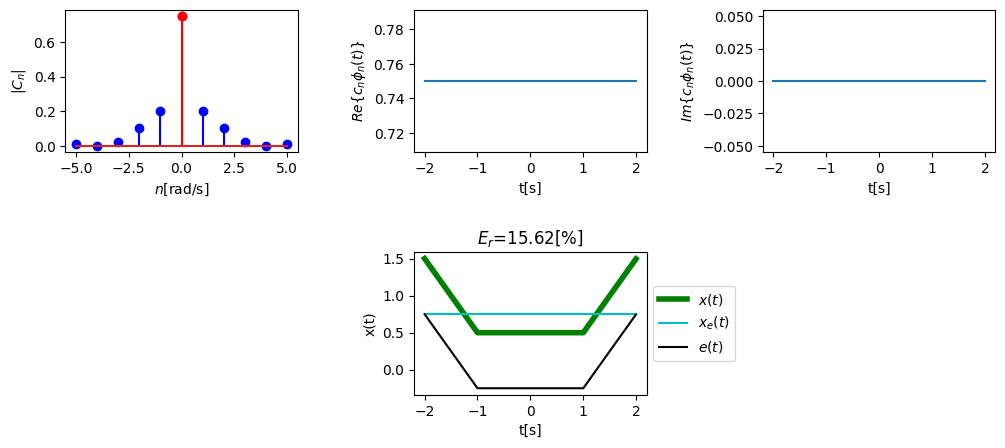

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$n$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe

    ax[1,1].plot(tv,x,'g',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='c',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='k',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim